In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
dataset = pd.read_csv('spam.csv', encoding = 'latin-1')

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset = dataset.iloc[:, :2]
dataset.columns = ['Outcome', 'Message']

In [5]:
dataset.head()

,Outcome,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Outcome']=le.fit_transform(dataset['Outcome'])

([<matplotlib.patches.Wedge at 0x21f2512fac8>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.6%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.4%')])

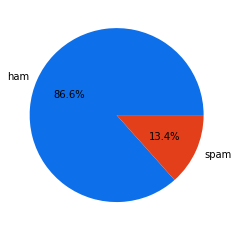

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.pie(dataset.Outcome.value_counts() , labels = ['ham','spam'],autopct='%1.1f%%', colors = ['#0E6FEA','#E33F1A'])

<BarContainer object of 2 artists>

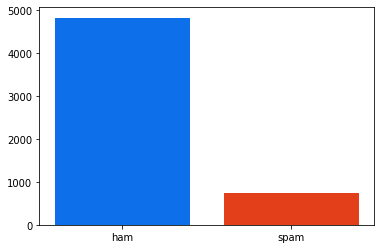

In [8]:
plt.bar(['ham','spam'], dataset.Outcome.value_counts(), color = ['#0E6FEA','#E33F1A'])

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
data = []

[nltk_data] Downloading package stopwords to C:\Users\sai
[nltk_data]     seravan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
for i in range(len(dataset)):
    Text = dataset['Message'][i]
    Text = re.sub('[^a-zA-Z]',' ',Text)
    Text = Text.lower()
    Text = Text.split()
    Text = [ps.stem(word) for word in Text if not word in set(stopwords.words('english'))]
    Text = ' '.join(Text)
    data.append(Text)

In [11]:
data

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=8000)
x=cv.fit_transform(data).toarray()
with open('CountVectorizer','wb') as file:
    pickle.dump(cv,file)
pickle.dump(cv,open("count_vec.pkl","wb"))
y=dataset.iloc[:,0].values

In [13]:
dataset

,Outcome,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [15]:
x_train.shape

(4457, 6221)

In [16]:
y_train.shape

(4457,)

In [17]:
x_test.shape

(1115, 6221)

In [18]:
y_test.shape

(1115,)

In [19]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\sai seravan\Documents\Zoom\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sai seravan\Documents\Zoom\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sai seravan\Documents\Zoom\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sai seravan\Documents\Zoom\lib\site-pa

In [20]:
cl=Sequential()

In [21]:
cl.add(Dense(units = 6302, activation = 'relu',init = 'uniform' ))

C:\Users\sai seravan\Documents\Zoom\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6302, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [22]:
cl.add(Dense(units = 5000, activation = 'relu',init = 'uniform' ))

C:\Users\sai seravan\Documents\Zoom\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=5000, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [23]:
cl.add(Dense(units = 1303, activation = 'relu',init = 'uniform' ))

C:\Users\sai seravan\Documents\Zoom\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1303, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [24]:
cl.add(Dense(units = 1, activation = 'sigmoid',init = 'uniform' ))

C:\Users\sai seravan\Documents\Zoom\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [25]:
cl.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [26]:
cl.fit(x_train,y_train,batch_size =4459, epochs = 20)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
4457/4457 [==============================] - 12s 3ms/step - loss: 0.6715 - acc: 0.7402
Epoch 2/20
4457/4457 [==============================] - 9s 2ms/step - loss: 1.6853 - acc: 0.8696
Epoch 3/20
4457/4457 [==============================] - 9s 2ms/step - loss: 0.7924 - acc: 0.8696
Epoch 4/20
4457/4457 [==============================] - 9s 2ms/step - loss: 0.4111 - acc: 0.8696
Epoch 5/20
4457/4457 [==============================] - 9s 2ms/step - loss: 0.4962 - acc: 0.8696
Epoch 6/20
4457/4457 [==============================] - 9s 2ms/step - loss: 0.4498 - acc: 0.8696
Epoch 7/20
4457/4457 [==============================] - 9s 2ms/step - loss: 0.3603 - acc: 0.8696
Epoch 8/20
4457/4457 [==============================] - 9s 2ms/step - loss: 0.3132 - acc: 0.8696
Epoch 9/20
4457/4457 [==============================] - 11s 2ms/step - loss: 0.2856 - acc: 0.8696
Epoch 10/20
4457/4457 [====

In [27]:
cl.save('smsmodel.h5')

In [28]:
y_sample=cl.predict(cv.transform(['Very bad']))

In [29]:
y_sample

array([[0.00734923]], dtype=float32)

In [30]:
from keras.models import load_model

In [31]:
cl=load_model('smsmodel.h5')
with open('CountVectorizer','rb') as file:
    cv=pickle.load(file)
    
    entered_input = "xxxmobilemovieclub use credit click wap link next txt messag click http wap xxxmobilemovieclub com n qjkgighjjgcbl"
    x_intent=cv.transform([entered_input])
    y_pred=cl.predict(x_intent)
    
    if(y_pred>0.5):
        print("spam")
    else:
        print("ham")

spam


In [32]:
    entered_input = "england v macedonia dont miss goal team news txt ur nation team eg england tri wale scotland txt poboxox w wq"
    x_intent=cv.transform([entered_input])
 
    y_pred=cl.predict(x_intent)

 
    if(y_pred>0.5):
        print("spam")
 
    else:
        print("ham")

spam


In [33]:
y_pred = cl.predict(x_test)

In [34]:
y_pred

array([[0.0000000e+00],
       [1.5478730e-03],
       [0.0000000e+00],
       ...,
       [5.4342479e-07],
       [0.0000000e+00],
       [1.6656395e-06]], dtype=float32)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

0.9829596412556054